# Understanding concentration inequalities 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Plotting some of the classic asymptoic rates for increasing and decreasing function to show what is better than what

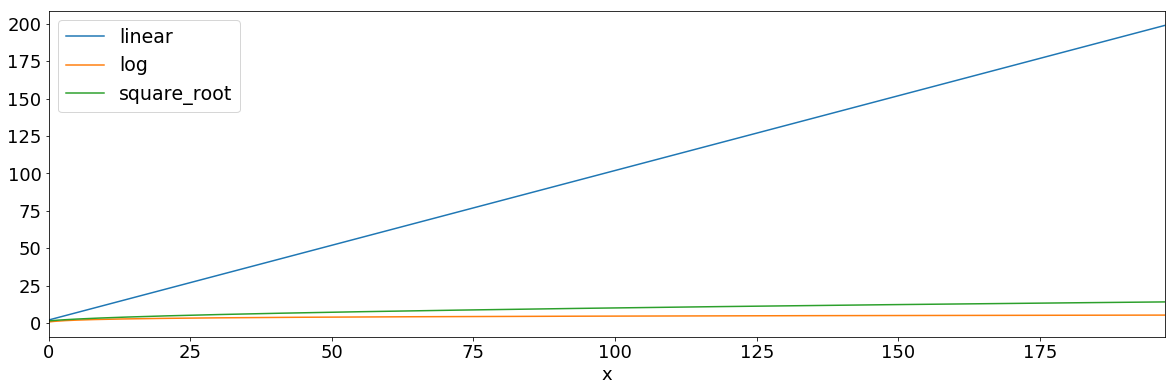

In [2]:
# Classical error rates
df = pd.DataFrame([{
'log' : np.log(x),
'square_root' : np.sqrt(x),
'linear' : x} 
                   for x in range(2, 200)])

ax = df.plot(figsize=(20, 6), fontsize=18)
ax.set_xlabel('x', fontsize=18)
plt.legend(loc=2, prop={'size': 19})


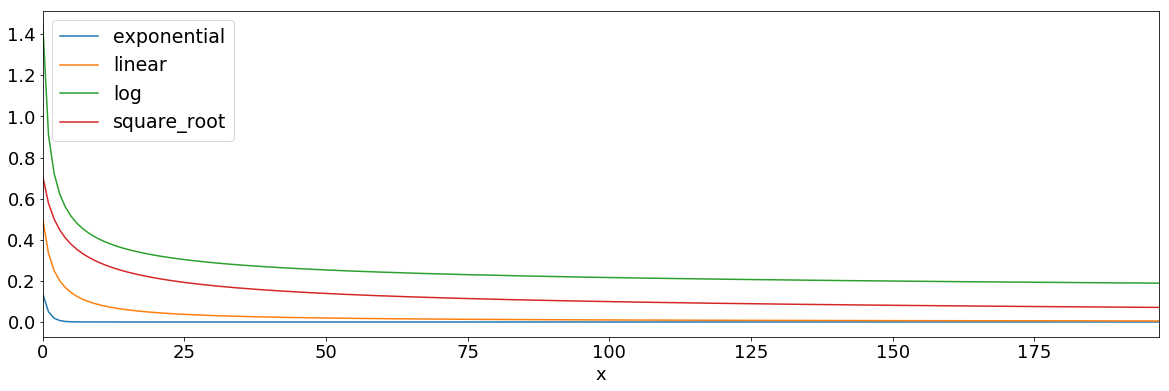

In [3]:
# Classical error rates
df = pd.DataFrame([{

'log' : 1/np.log(x),
'square_root' : 1/np.sqrt(x),
'linear' : 1/x,
'exponential' : 1/np.exp(x)
                   } 
                   for x in range(2, 200)])

ax = df.plot(figsize=(20, 6), fontsize=18)
ax.set_xlabel('x', fontsize=18)
plt.legend(loc=2, prop={'size': 19})


# Hoeffding's inequality

Since it only assumes Sub-gaussian ness (can think bounded or skinny tailed) this is the loosest bound. The process of understanding the other bounds is the same. We run a monte carlo simulation and empirically capture how often something happens or not and compare it with what theory said. Although we use Bernoulli random variables in this writeup -- Hoeffding only needs bounded random variables.

$$\mathbb{P}[ | X_n - \mu| \geq t] \leq e^{-2t^2n}$$

So we run a simulation where we do the experiment many times and see how often the empirical mean is outside the true mean by error more than $\sqrt{\frac{1}{2n}\log(2/\delta)}$

Upper range 0.4960322791319921

Bad event count:  4
Theoretical bad event upperbound : 0.05
Empirical bad event fraction :0.004 


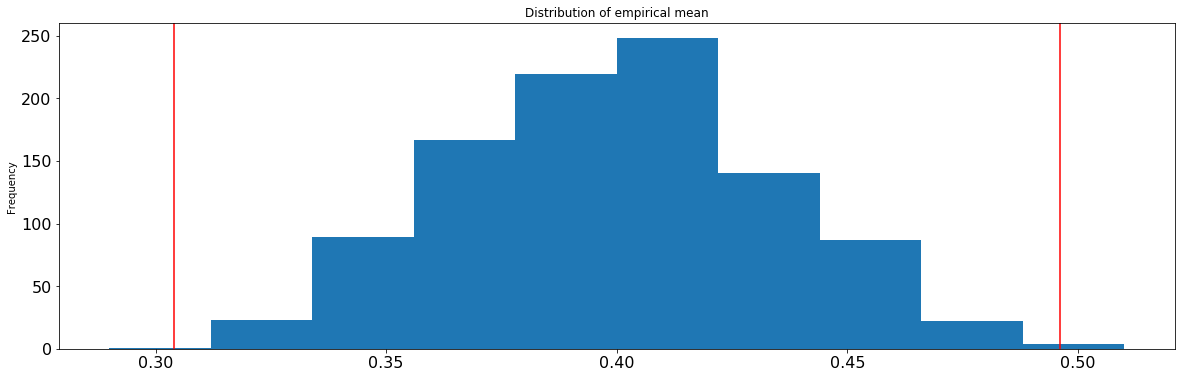

In [4]:
p = 0.4
n = 200
delta = 0.05
num_experiments = 1000
sample_sums = np.random.binomial(n, p, size=num_experiments)
sample_means = [x/n for x in sample_sums]
    
ax = pd.Series(sample_means).plot(kind='hist', 
                                  figsize=(20,6),
                                  fontsize=16,
                                  title="Distribution of empirical mean")  



# Pick a confidence parameter 
delta = 0.05
error_bar = np.sqrt(1/(2*n)*np.log(2/delta))

plt.axvline(x=p + error_bar, c='red')
plt.axvline(x=p -  error_bar, c='red')

print("Upper range", p + error_bar)
bad_event_count = 0
for i, emp_mean in enumerate(sample_means):
    if abs(emp_mean - p) >= error_bar:
        bad_event_count += 1

print("\nBad event count: ", bad_event_count)
print("Theoretical bad event upperbound : {}\nEmpirical bad event fraction :{} ".format(delta, bad_event_count/num_experiments))
        

# Error : $O(1/n)$

That's too tight -- my confidence intervals should no longer hold. Hoeffding gave me $\sqrt{n}$. 

So this or exponential decay of error with n is not possible with guarantees.

Upper range 0.405

Bad event count:  949
Theoretical bad event upperbound : 0.05
Empirical bad event fraction :0.949 


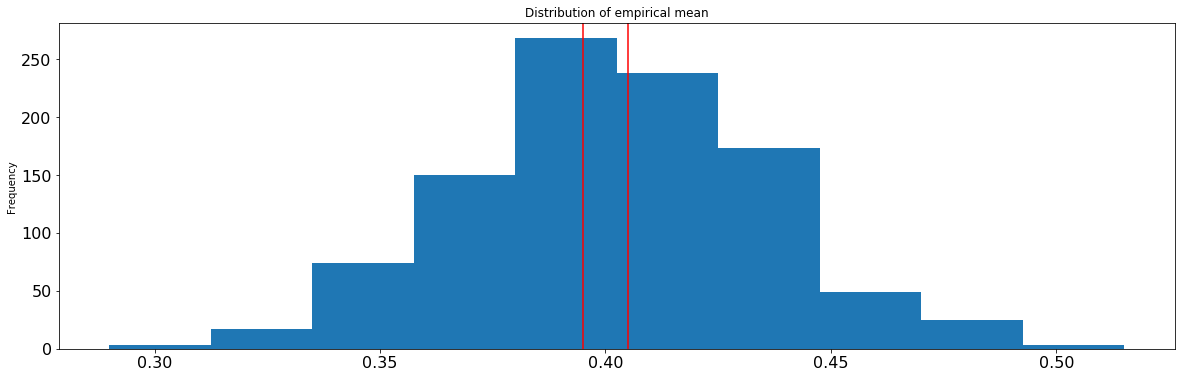

In [5]:
p = 0.4
n = 200
delta
num_experiments = 1000
sample_sums = np.random.binomial(n, p, size=num_experiments)
sample_means = [x/n for x in sample_sums]
    
ax = pd.Series(sample_means).plot(kind='hist', 
                                  figsize=(20,6),
                                  fontsize=16,
                                  title="Distribution of empirical mean")  



# Pick a confidence parameter 
delta = 0.05
error_bar = 1/(n)

plt.axvline(x=p + error_bar, c='red')
plt.axvline(x=p -  error_bar, c='red')

print("Upper range", p + error_bar)
bad_event_count = 0
for i, emp_mean in enumerate(sample_means):
    if abs(emp_mean - p) >= error_bar:
        bad_event_count += 1

print("\nBad event count: ", bad_event_count)
print("Theoretical bad event upperbound : {}\nEmpirical bad event fraction :{} ".format(delta, bad_event_count/num_experiments))
        

# Error : $O(1/\sqrt{n})$

I get some bad events but not over the probability limit.



Upper range 0.47071067811865475

Bad event count:  38
Theoretical bad event upperbound : 0.05
Empirical bad event fraction :0.038 


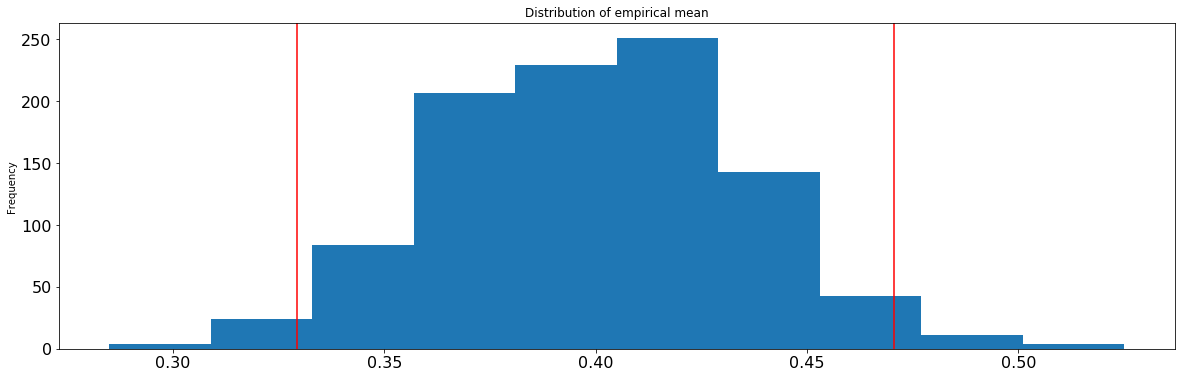

In [7]:
p = 0.4
n = 200
delta
num_experiments = 1000
sample_sums = np.random.binomial(n, p, size=num_experiments)
sample_means = [x/n for x in sample_sums]
    
ax = pd.Series(sample_means).plot(kind='hist', 
                                  figsize=(20,6),
                                  fontsize=16,
                                  title="Distribution of empirical mean")  



# Pick a confidence parameter 
delta = 0.05
error_bar = 1/(np.sqrt(n))

plt.axvline(x=p + error_bar, c='red')
plt.axvline(x=p -  error_bar, c='red')

print("Upper range", p + error_bar)
bad_event_count = 0
for i, emp_mean in enumerate(sample_means):
    if abs(emp_mean - p) >= error_bar:
        bad_event_count += 1

print("\nBad event count: ", bad_event_count)
print("Theoretical bad event upperbound : {}\nEmpirical bad event fraction :{} ".format(delta, bad_event_count/num_experiments))
        